In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
!pip install missingno
import warnings
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [ ]:
# Reading the dataset
from google.colab import drive
drive.mount('/content/drive')
df2 = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
df2.head()

Mounted at /content/drive


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/IDs_mapping.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df1

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [ ]:
#101766 rows and 49 columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df2.shape

(101766, 50)

In [ ]:
#Not needed
df2.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
encounter_id,101766.000,165201645.623,102640295.983,12522.000,43368426.000,84961194.000,152388987.000,230270887.500,311346359.000,378962843.000,430219329.200,443867222.000
patient_nbr,101766.000,54330400.695,38696359.347,135.000,3957115.500,23413221.000,45505143.000,87545949.750,103287825.000,111480273.000,160818198.800,189502619.000
admission_type_id,101766.000,2.024,1.445,1.000,1.000,1.000,1.000,3.000,5.000,6.000,6.000,8.000
discharge_disposition_id,101766.000,3.716,5.280,1.000,1.000,1.000,1.000,4.000,7.000,18.000,25.000,28.000
admission_source_id,101766.000,5.754,4.064,1.000,1.000,1.000,7.000,7.000,7.000,17.000,17.000,25.000
time_in_hospital,101766.000,4.396,2.985,1.000,1.000,2.000,4.000,6.000,9.000,11.000,14.000,14.000
num_lab_procedures,101766.000,43.096,19.674,1.000,14.000,31.000,44.000,57.000,67.000,73.000,85.000,132.000
num_procedures,101766.000,1.340,1.706,0.000,0.000,0.000,1.000,2.000,4.000,5.000,6.000,6.000
num_medications,101766.000,16.022,8.128,1.000,7.000,10.000,15.000,20.000,26.000,31.000,43.000,81.000
number_outpatient,101766.000,0.369,1.267,0.000,0.000,0.000,0.000,0.000,1.000,2.000,5.000,42.000


In [ ]:
df2['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

**PREPROCESSING**

In [ ]:
#removed rows where gender=Unknown/Invalid, race = ? or diag=?
df2.drop(df2[df2['gender']=='Unknown/Invalid'].index, inplace=True)
df2.drop(df2[df2['race']=='?'].index, inplace=True)
df2.drop(df2[df2['diag_1']=='?'].index, inplace=True)
df2.drop(df2[df2['diag_2']=='?'].index, inplace=True)
df2.drop(df2[df2['diag_3']=='?'].index, inplace=True)

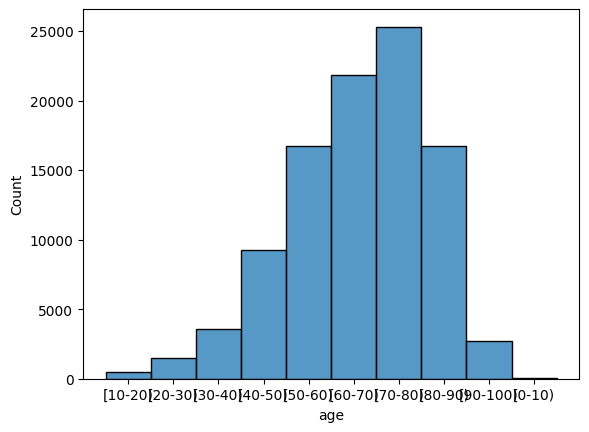

In [ ]:
sns.histplot(x ='age', data = df2)
plt.show()

In the dataset, age had range values but we need single values. Replaced them by their avg values

In [ ]:
df2['age'] = [[y for y in x.split('-',1)] for x in df2['age']]
for x in df2['age']:
    x[0]=x[0].split('[')
    x[1]=x[1].split(')')
for x in df2['age']:
    x[0]=int(x[0][1])
    x[1]=int(x[1][0])
df2['age']= pd.Series([sum(ages)/2 for ages in df2['age']])
df2.dropna(subset='age',axis=0)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,25.000,?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,35.000,?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,45.000,?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,55.000,?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,65.000,?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98046,396041360,111506031,AfricanAmerican,Male,65.000,?,3,1,7,7,UN,Family/GeneralPractice,87,4,39,0,3,2,38,349,276,9,None,None,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
98047,396041378,100111914,Caucasian,Male,75.000,?,2,1,7,2,MC,Emergency/Trauma,32,0,22,0,1,0,428,428,416,9,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
98048,396041390,97699437,Caucasian,Male,85.000,?,1,2,7,6,MC,Emergency/Trauma,68,5,29,1,0,3,996,585,403,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
98049,396041570,85821255,Caucasian,Male,75.000,?,1,6,7,4,MC,?,72,0,18,2,0,1,518,425,491,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30


In [ ]:
df2.admission_type_id.value_counts()

1    52178
3    18193
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64

In [ ]:
#Joining two datframes where df.admission_type_id	= df2.admission_type_id	for getting corresponding description of admission type
df4=df1.iloc[:8]
df4['admission_type_id']=df4['admission_type_id'].astype(int)
df2=df2.join(df4.set_index('admission_type_id')[['description']], on='admission_type_id')
df4

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
#Joining two datframes where df1.discharge_disposition_id	= df2.discharge_disposition_id	for getting corresponding description of discharge type
df5=df1.iloc[10:40]
df5.rename(columns = {'admission_type_id':'discharge_disposition_id','description':'discharge_description'}, inplace = True)
df5['discharge_disposition_id']=df5['discharge_disposition_id'].astype(int)
df2=df2.join(df5.set_index('discharge_disposition_id')[['discharge_description']], on='discharge_disposition_id')
df5

,discharge_disposition_id,discharge_description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


**Is admission source type column relevant? Should we remove it?**


In [ ]:
#Joining two datframes where df1.admission_source_id	= df2.admission_source_id	for getting corresponding description of admission source type
df6=df1.iloc[42:67]
df6.rename(columns = {'admission_type_id':'admission_source_id','description':'admission_source_description'}, inplace = True)
df6['admission_source_id']=df6['admission_source_id'].astype(int)
df2=df2.join(df6.set_index('admission_source_id')[['admission_source_description']], on='admission_source_id')
df6

,admission_source_id,admission_source_description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [ ]:
df2

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,discharge_description,admission_source_description
1,149190,55629189,Caucasian,Female,25.000,?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,35.000,?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,45.000,?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,55.000,?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
5,35754,82637451,Caucasian,Male,65.000,?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Urgent,Discharged to home,Clinic Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,NaN,?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,Emergency Room
101762,443847782,74694222,AfricanAmerican,Female,NaN,?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,443854148,41088789,Caucasian,Male,NaN,?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
101764,443857166,31693671,Caucasian,Female,NaN,?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent,Discharged/transferred to SNF,Emergency Room


In [ ]:
df2.description.value_counts()

Emergency        52178
Elective         18193
Urgent           17543
Not Available     4661
Not Mapped         312
Trauma Center       20
Newborn             10
Name: description, dtype: int64

In [ ]:
#Dropping columns because of many null values or irrelevance. Removed 4 columns
#Dropping columns discharge_disposition_id,admission_source_id,admission_type_id because we've mapped their descriptions with the original dataframe df2 and will encode it after preprocessing
df2.drop(['discharge_disposition_id','admission_source_id','admission_type_id','encounter_id','patient_nbr','payer_code','weight'], inplace=True,axis=1)


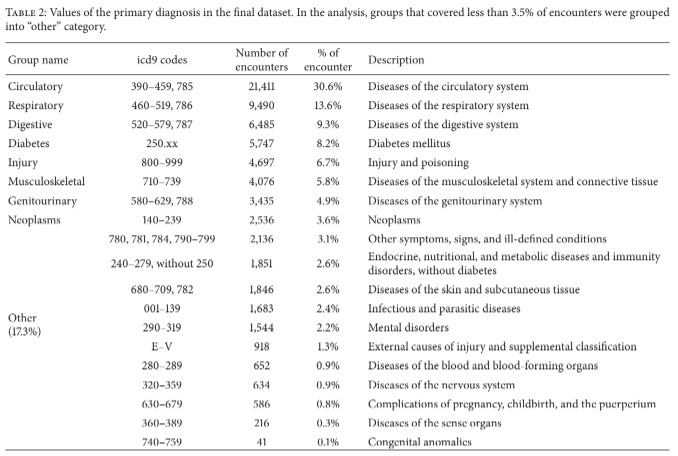
Mapped diag_1,diag_2,diag_3 accordig to this

In [ ]:
def map_diagnosis(data, cols):
  for col in cols:
    data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
    data[col] = data[col].astype(np.float64)
  for col in cols:
    data["temp_diag"] = np.nan
    data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
    data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
    data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
    data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
    data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
    data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
    data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
    data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"
    data["temp_diag"] = data["temp_diag"].fillna("Other")
    data[col] = data["temp_diag"]
    data = data.drop("temp_diag", axis=1)
  return data


In [ ]:
df2 = map_diagnosis(df2,["diag_1","diag_2","diag_3"])

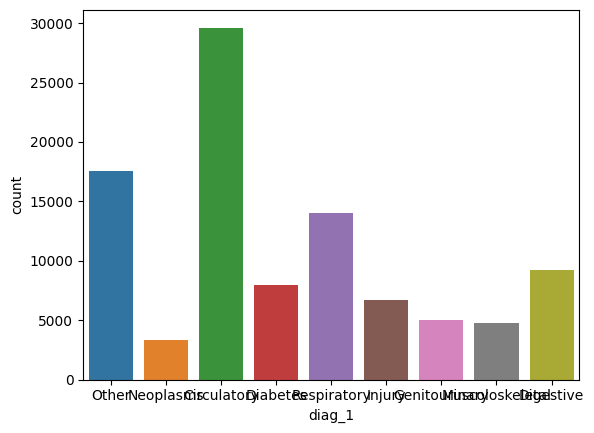

In [ ]:
sns.countplot(x ='diag_1', data = df2)
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   race                          98052 non-null  object 
 1   gender                        98052 non-null  object 
 2   age                           94476 non-null  float64
 3   time_in_hospital              98052 non-null  int64  
 4   medical_specialty             98052 non-null  object 
 5   num_lab_procedures            98052 non-null  int64  
 6   num_procedures                98052 non-null  int64  
 7   num_medications               98052 non-null  int64  
 8   number_outpatient             98052 non-null  int64  
 9   number_emergency              98052 non-null  int64  
 10  number_inpatient              98052 non-null  int64  
 11  diag_1                        98052 non-null  object 
 12  diag_2                        98052 non-null  object 
 13  

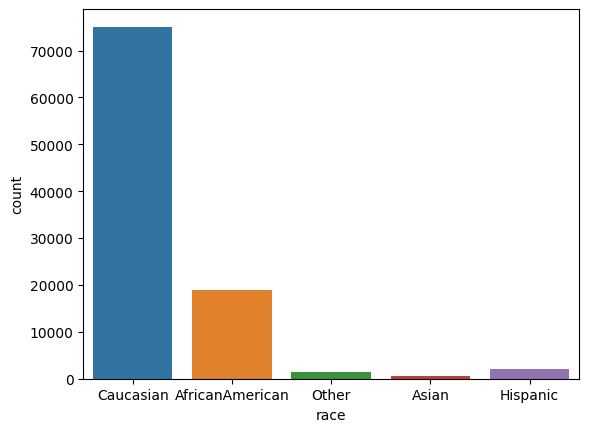

In [ ]:
sns.countplot(x ='race', data = df2)
plt.show()

Description: 0,Not-mapped-> Not Available(5), Urgent->Emergency(1)

---


Discharge Description: 0,Unknown/Invalid->Not-mapped, Any row with expired word if replaced with Expired, Any row with home word if replaced with Hospice/Home

---


admission_source_description: 0,Unknown/Invalid,Not Available->Not-mapped

---
As other, asian and hispanic are very less, we replace asian and hispanic with other


This cell is for two classe <30 and >30 + NO

In [ ]:
#for <30,>30+NO
df2 = df2.dropna()
df2=df2.replace({
             'max_glu_serum':{'None':0,'Norm':1,'>200':200,'>300':300},
             'A1Cresult':{'None':0,'Norm':1,'>7':7,'>8':8},
             'description':{0:'Not Available','Not Mapped':'Not Available','Urgent':'Emergency'},
             'discharge_description':{0:'Not Mapped','Unknown/Invalid':'Not Mapped','Expired at home. Medicaid only, hospice.':'Expired','Expired in a medical facility. Medicaid only, hospice.':'Expired','Expired, place unknown. Medicaid only, hospice.':'Expired',
                                      'Discharged/transferred to home with home health service':'Hospice / home','Discharged/transferred to home under care of Home IV provider':'Hospice / home','Discharged to home':'Hospice / home'},
             'admission_source_description':{0:'Not Mapped','Unknown/Invalid':'Not Mapped','Not Available':'Not Mapped',' Not Available':'Not Mapped'},
             'diabetesMed':{'Yes':1,'No':0},
             'change':{'Ch':1,'No':0},
             'readmitted':{'>30':0,'NO':0,'<30':1},
             'race':{'Asian':'Other','Hispanic':'Other'}})

This cell is for two classe <30 + >30 and NO

In [ ]:
#for <30+>30,NO
df2 = df2.dropna()
df2=df2.replace({
             'max_glu_serum':{'None':0,'Norm':1,'>200':200,'>300':300},
             'A1Cresult':{'None':0,'Norm':1,'>7':7,'>8':8},
             'description':{0:'Not Available','Not Mapped':'Not Available','Urgent':'Emergency'},
             'discharge_description':{0:'Not Mapped','Unknown/Invalid':'Not Mapped','Expired at home. Medicaid only, hospice.':'Expired','Expired in a medical facility. Medicaid only, hospice.':'Expired','Expired, place unknown. Medicaid only, hospice.':'Expired',
                                      'Discharged/transferred to home with home health service':'Hospice / home','Discharged/transferred to home under care of Home IV provider':'Hospice / home','Discharged to home':'Hospice / home'},
             'diabetesMed':{'Yes':1,'No':0},
             'change':{'Ch':1,'No':0},
             'readmitted':{'>30':1,'NO':0,'<30':1},
             'race':{'Asian':'Other','Hispanic':'Other'}})

In [ ]:
df2.admission_source_description.value_counts()

 Emergency Room                                               50001
 Physician Referral                                           25966
Transfer from a hospital                                       2374
 Transfer from another health care facility                    1830
Clinic Referral                                                 903
 Transfer from a Skilled Nursing Facility (SNF)                 686
 Not Mapped                                                     160
HMO Referral                                                     95
Not Mapped                                                       46
 Court/Law Enforcement                                           14
 Transfer from hospital inpt/same fac reslt in a sep claim       11
 Transfer from critial access hospital                            7
 Extramural Birth                                                 2
Normal Delivery                                                   2
 Transfer from Ambulatory Surgery Center        

<Axes: xlabel='age', ylabel='count'>

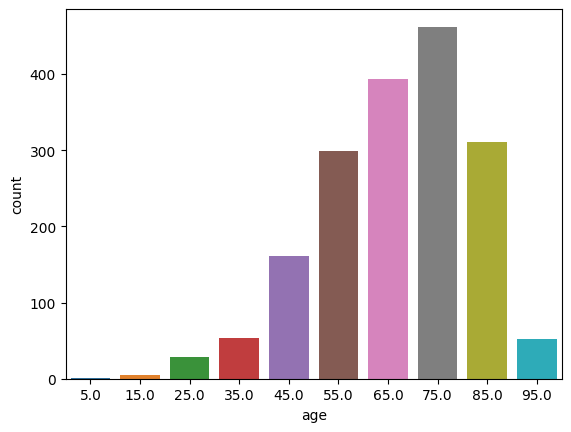

In [ ]:
# When the patient wasn't prescribed any diabtes meds but he readmitted himself. Age-wise
sns.countplot(x ='age', data = df2[(df2['diabetesMed']==0) & (df2['readmitted']==1)])

<Axes: xlabel='age', ylabel='count'>

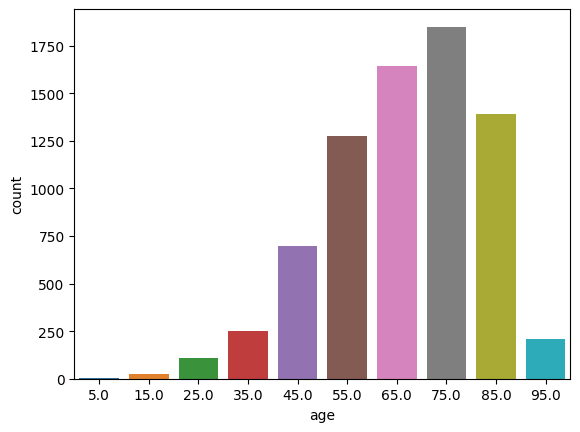

In [ ]:
# When the patient wasn prescribed any diabtes meds and he readmitted himself. Age-wise
sns.countplot(x ='age', data = df2[(df2['diabetesMed']==1) & (df2['readmitted']==1)])

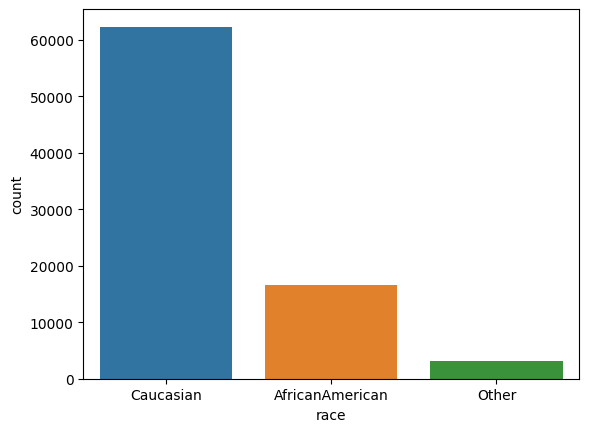

In [ ]:
sns.countplot(x ='race', data = df2)
plt.show()

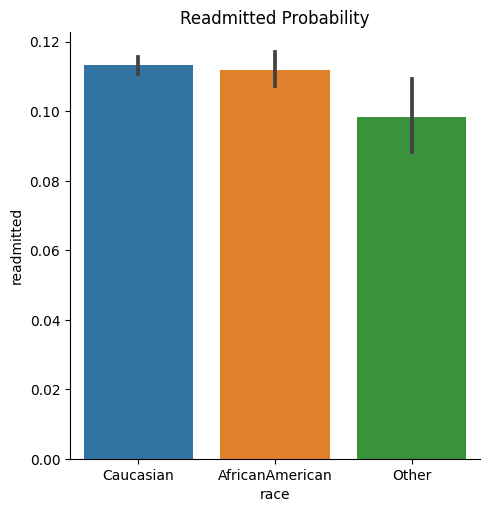

In [ ]:
sns.catplot(x = "race", y = "readmitted",data = df2, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

<Axes: >

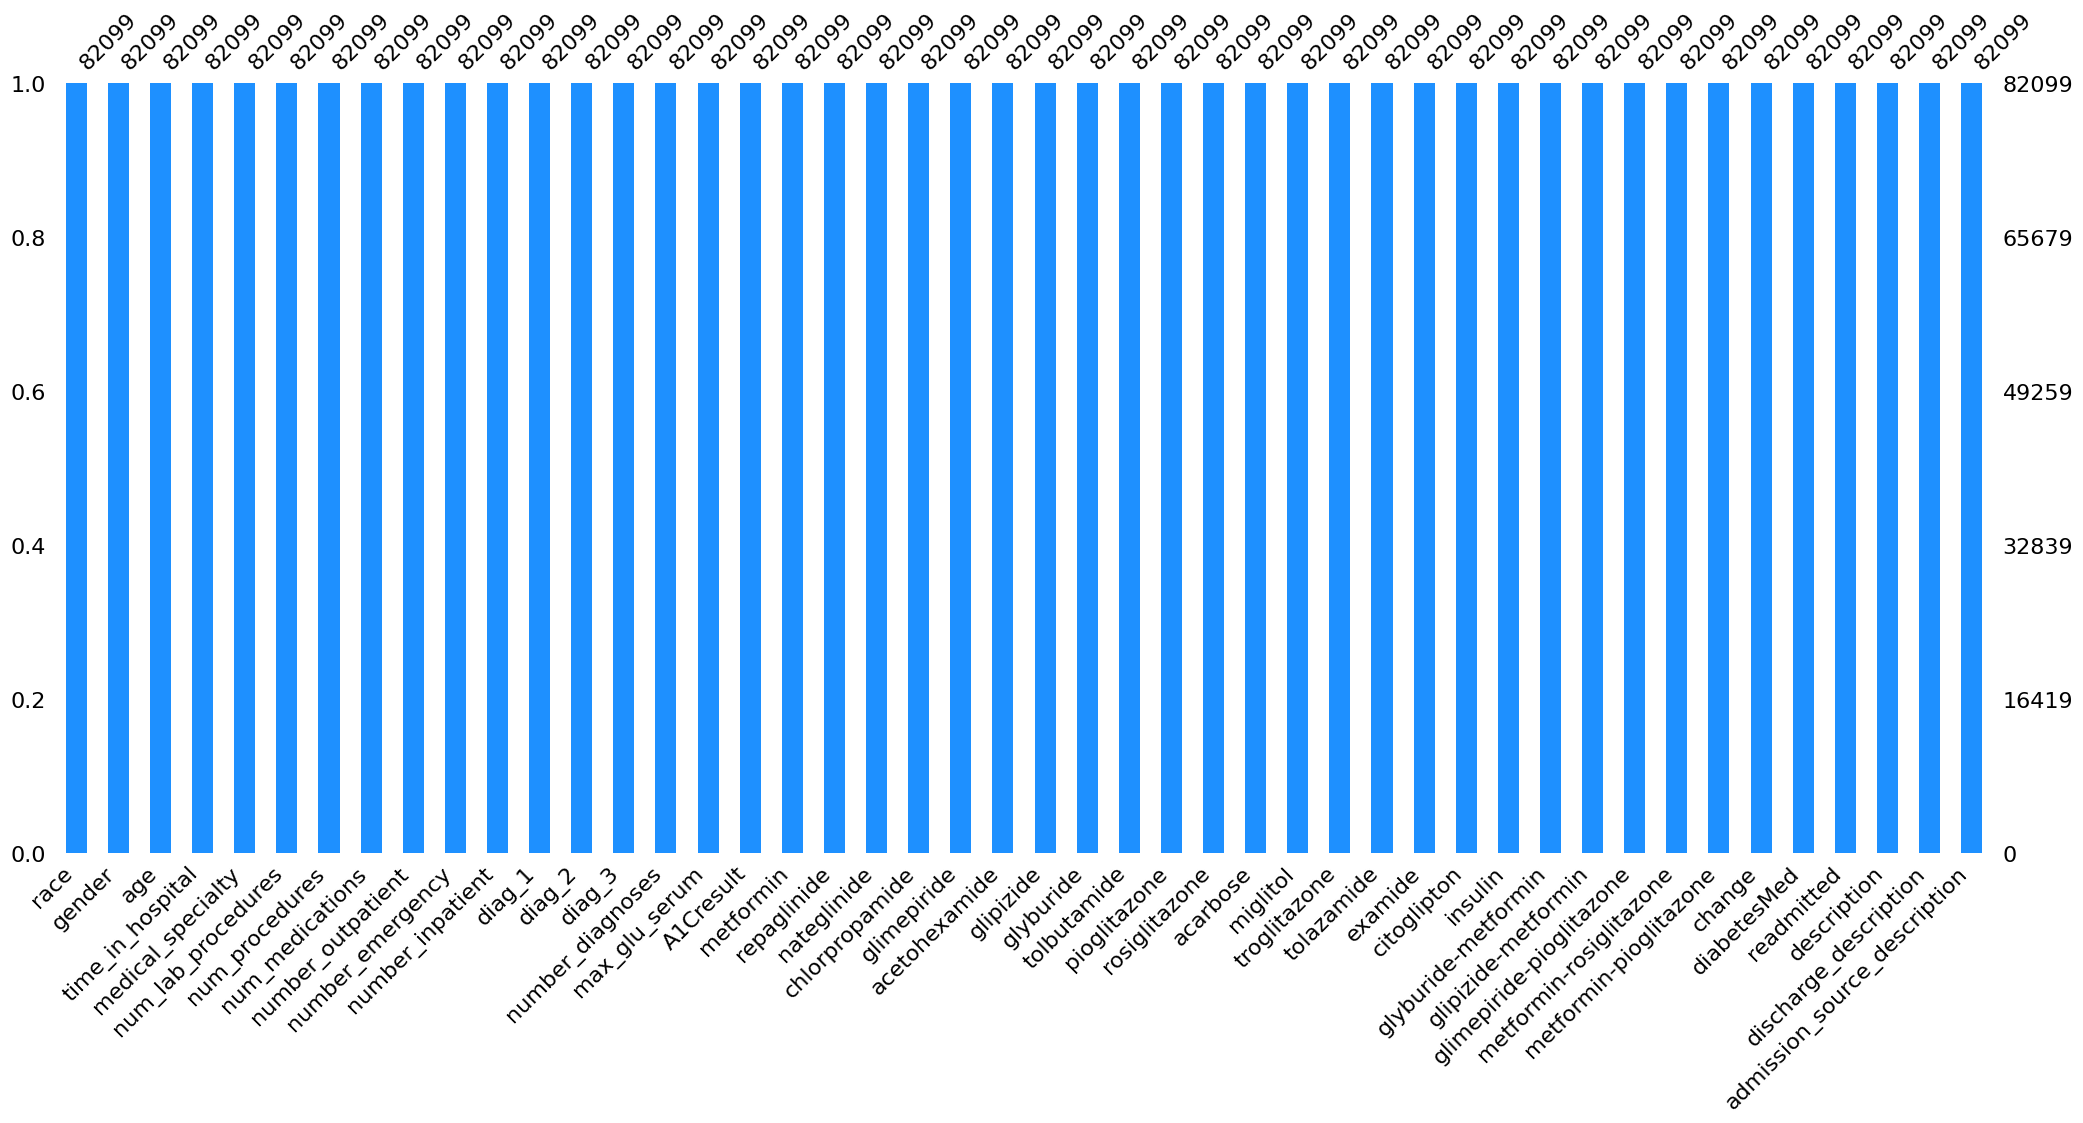

In [ ]:
#No mising values
msno.bar(df2, color="dodgerblue")

In [ ]:
df2.corr()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
age,1.000,-0.004,-0.004,-0.007,0.004,0.008,0.003,0.005,0.010,0.004,-0.002,0.007,0.004,0.005
time_in_hospital,-0.004,1.000,0.323,0.189,0.465,-0.003,-0.009,0.069,0.223,0.034,0.054,0.112,0.067,0.042
num_lab_procedures,-0.004,0.323,1.000,0.033,0.279,0.020,0.010,0.043,0.164,0.042,0.211,0.081,0.044,0.020
num_procedures,-0.007,0.189,0.033,1.000,0.376,-0.021,-0.037,-0.068,0.055,-0.008,-0.015,0.007,-0.003,-0.013
num_medications,0.004,0.465,0.279,0.376,1.000,0.047,0.013,0.066,0.243,0.024,0.021,0.250,0.190,0.037
number_outpatient,0.008,-0.003,0.020,-0.021,0.047,1.000,0.090,0.111,0.093,0.040,-0.010,0.017,0.008,0.018
number_emergency,0.003,-0.009,0.010,-0.037,0.013,0.090,1.000,0.267,0.049,0.020,-0.002,0.035,0.021,0.061
number_inpatient,0.005,0.069,0.043,-0.068,0.066,0.111,0.267,1.000,0.104,0.039,-0.047,0.027,0.032,0.164
number_diagnoses,0.010,0.223,0.164,0.055,0.243,0.093,0.049,0.104,1.000,0.023,-0.015,0.044,0.015,0.048
max_glu_serum,0.004,0.034,0.042,-0.008,0.024,0.040,0.020,0.039,0.023,1.000,0.014,-0.024,-0.029,0.009


Can't use correlation coeff because no two featues are highly correlated. Highest is 0.51

<Axes: >

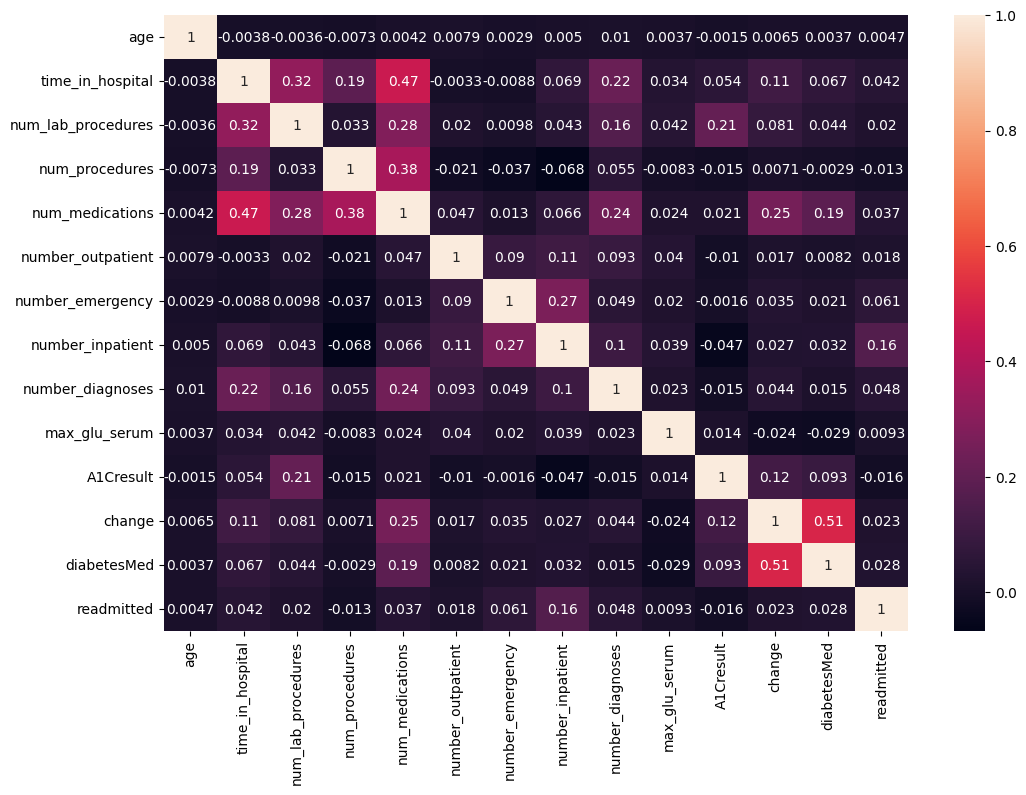

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True)

In [ ]:
#Encoding so that string or object types can be converted to int. For ex in gender female=0 and male=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["race"] = le.fit_transform(df2["race"])
df2['gender'] = le.fit_transform(df2['gender'])
df2["metformin"] = le.fit_transform(df2["metformin"])
df2["insulin"] = le.fit_transform(df2["insulin"])
df2["repaglinide"] = le.fit_transform(df2["repaglinide"])
df2["nateglinide"] = le.fit_transform(df2["nateglinide"])
df2["chlorpropamide"] = le.fit_transform(df2["chlorpropamide"])
df2["glimepiride"] = le.fit_transform(df2["glimepiride"])
df2["acetohexamide"] = le.fit_transform(df2["acetohexamide"])
df2["glipizide"] = le.fit_transform(df2["glipizide"])
df2["glyburide"] = le.fit_transform(df2["glyburide"])
df2["tolbutamide"] = le.fit_transform(df2["tolbutamide"])
df2["pioglitazone"] = le.fit_transform(df2["pioglitazone"])
df2["rosiglitazone"] = le.fit_transform(df2["rosiglitazone"])
df2["acarbose"] = le.fit_transform(df2["acarbose"])
df2["miglitol"] = le.fit_transform(df2["miglitol"])
df2["troglitazone"] = le.fit_transform(df2["troglitazone"])
df2["tolazamide"] = le.fit_transform(df2["tolazamide"])
df2["examide"] = le.fit_transform(df2["examide"])
df2["citoglipton"] = le.fit_transform(df2["citoglipton"])
df2["insulin"] = le.fit_transform(df2["insulin"])
df2["glyburide-metformin"] = le.fit_transform(df2["glyburide-metformin"])
df2["glipizide-metformin"] = le.fit_transform(df2["glipizide-metformin"])
df2["metformin-rosiglitazone"] = le.fit_transform(df2["metformin-rosiglitazone"])
df2["metformin-pioglitazone"] = le.fit_transform(df2["metformin-pioglitazone"])
df2["glimepiride-pioglitazone"] = le.fit_transform(df2["glimepiride-pioglitazone"])
df2["description"] = le.fit_transform(df2["description"])
df2["discharge_description"] = le.fit_transform(df2["discharge_description"])
df2['medical_specialty'].replace(to_replace='?',value='Missing',inplace=True)
df2["medical_specialty"] = le.fit_transform(df2["medical_specialty"])
df2["diag_1"] = le.fit_transform(df2["diag_1"])
df2["diag_2"] = le.fit_transform(df2["diag_2"])
df2["diag_3"] = le.fit_transform(df2["diag_3"])
df2.medical_specialty.value_counts()

19    40272
18    12318
8      7091
11     5061
3      4095
      ...  
0         1
43        1
22        1
40        1
49        1
Name: medical_specialty, Length: 71, dtype: int64

In [ ]:
df2["admission_source_description"] = le.fit_transform(df2["admission_source_description"])

Dropped bcoz they had near 0 feature importance in RF, DTC, LGBM, XGB algos

In [ ]:
df2.drop(['tolazamide','acetohexamide','examide','tolbutamide','miglitol','troglitazone','citoglipton',"glimepiride-pioglitazone","metformin-pioglitazone","metformin-rosiglitazone",'glipizide-metformin'], inplace=True,axis=1)

In [ ]:
df2.change.value_counts()

0    43467
1    38632
Name: change, dtype: int64

In [ ]:
#35 features
df2.info()

NameError: ignored

In [ ]:
df2.readmitted.value_counts()

0    72875
1     9224
Name: readmitted, dtype: int64

In [ ]:
len(df2['age'])

82099

In [ ]:
df2

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,description,discharge_description,admission_source_description
1,1,0,25.000,3,19,59,0,18,0,0,0,7,1,7,9,0,0,1,1,1,1,1,1,1,1,1,1,3,1,1,1,0,1,12,1
2,0,0,35.000,2,19,11,5,13,2,0,1,7,1,7,6,0,0,1,1,1,1,1,2,1,1,1,1,1,1,0,1,0,1,12,1
3,1,1,45.000,2,19,44,1,16,0,0,0,7,1,0,7,0,0,1,1,1,1,1,1,1,1,1,1,3,1,1,1,0,1,12,1
4,1,1,55.000,1,19,51,0,8,0,0,0,6,6,1,5,0,0,1,1,1,1,1,2,1,1,1,1,2,1,1,1,0,1,12,1
5,1,1,65.000,3,19,31,6,16,0,0,0,0,0,1,9,0,0,1,1,1,1,1,1,1,1,1,1,2,1,0,1,0,1,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98046,0,1,65.000,7,11,87,4,39,0,3,2,7,7,7,9,0,0,1,2,1,1,1,1,1,1,1,1,0,1,1,1,0,0,12,1
98047,1,1,75.000,2,8,32,0,22,0,1,0,0,0,0,9,0,0,2,1,1,1,2,1,1,1,1,1,2,1,1,1,0,1,12,1
98048,1,1,85.000,6,8,68,5,29,1,0,3,4,3,0,9,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,7,1
98049,1,1,75.000,4,19,72,0,18,2,0,1,8,0,8,9,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,12,1


We had 3 classes i.e., NO, >30 and <30 with <30 being the most important one. As the other two classes were very similar in all the values, we combined them.

<Axes: xlabel='readmitted', ylabel='count'>

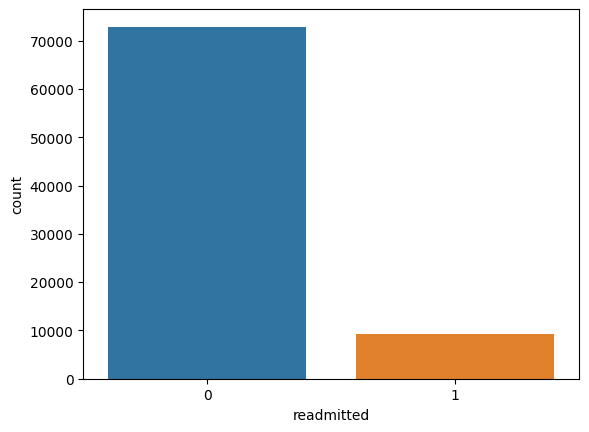

In [ ]:
sns.countplot(x ='readmitted', data = df2)

As we had imbalanced data we have to balance them. >30 had 75k and <30 had 10k records. We upsampled <30 to 25000 and downsampled >30 to 40000

---


For <30+>30,NO => no resampling as they both have round 40k records

In [ ]:
df2_majority = df2[df2.readmitted==0]
df2_minority = df2[df2.readmitted==1]

from sklearn.utils import resample
df2_minority = resample(df2_minority,
                                 replace=True,
                                 n_samples=25000,
                                 random_state=123)

df2_majority = resample(df2_majority,
                replace=True,
                n_samples=40000,
                random_state=123)

# Combine minority class with downsampled majority class
df2_downsampled = pd.concat([df2_majority, df2_minority])

In [ ]:
#60000 rows after resampling and 46 columns
df2_downsampled.shape

(65000, 35)

<Axes: xlabel='readmitted', ylabel='count'>

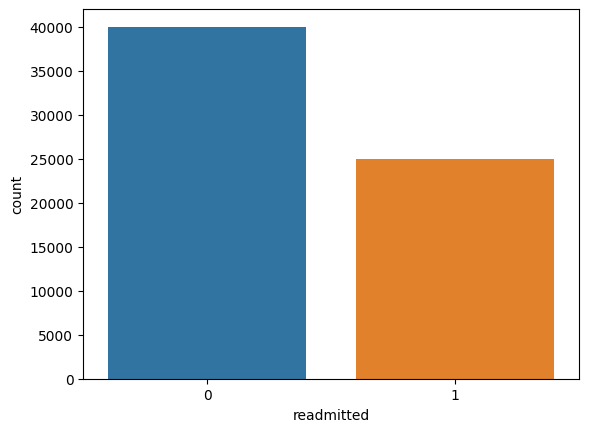

In [ ]:
sns.countplot(x ='readmitted', data = df2_downsampled)

In [ ]:
X=df2_downsampled.drop('readmitted',axis=1)
y=df2_downsampled['readmitted']
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.20,shuffle=True)

In [ ]:
X_train.shape

(52000, 34)

In [ ]:
X_test.shape

(13000, 34)

In [ ]:
df2_downsampled.isnull().values.any()

False

In [ ]:
df2_downsampled.to_csv('/content/drive/MyDrive/diabetic_new.csv', sep=',', index=False,header=True)
new_df = pd.read_csv('/content/drive/MyDrive/diabetic_new.csv')

Used all these algos so that we can compare with other papers who have used those

---
We can train the algos for >30+<30,NO classes too after parameter tuning


In [ ]:
lgr_tuned = LogisticRegression(random_state=357).fit(X_train, y_train)
knn_tuned = KNeighborsClassifier().fit(X_train, y_train)
svm_tuned = SVC(random_state=357,gamma='auto',C=100).fit(X_train, y_train)
gnb_tuned = GaussianNB().fit(X_train, y_train)
dtc_tuned = DecisionTreeClassifier(random_state=357).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=357,max_depth= 12,max_features= 12,n_estimators= 1200,min_samples_split= 5).fit(X_train, y_train)
lgbm = LGBMClassifier(random_state=357,learning_rate=0.4,n_estimators=1200,max_depth=15,colsample_bytree=1).fit(X_train, y_train)
xgb = XGBClassifier(random_state=357,learning_rate=0.1,n_estimators=1200,max_depth=15,colsample_bytree=1).fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(random_state=357,max_depth= 12,max_features= 12,n_estimators= 1200,min_samples_split= 5).fit(X_train, y_train)

In [ ]:
lgbm = LGBMClassifier(random_state=357,learning_rate=0.4,n_estimators=1200,max_depth=15,colsample_bytree=1).fit(X_train, y_train)

In [ ]:
xgb = XGBClassifier(random_state=357,learning_rate=0.1,n_estimators=1200,max_depth=15,colsample_bytree=1).fit(X_train, y_train)

In [ ]:
models = [("LGR", lgr_tuned),
          ("KNN", knn_tuned),
          ("SVM", svm_tuned),
          ("GNB", gnb_tuned),
          ("DTC", dtc_tuned),
          ("RF", rf),
          ("LGBM", lgbm),
          ("XGB", xgb)
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

LGR: (0.645923)
KNN: (0.717308)
SVM: (0.926231)
GNB: (0.633308)
DTC: (0.883538)
RF: (0.744077)
LGBM: (0.919385)
XGB: (0.935769)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7642,  427],
       [ 408, 4523]])

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95      8069\n           1       0.91      0.92      0.92      4931\n\n    accuracy                           0.94     13000\n   macro avg       0.93      0.93      0.93     13000\nweighted avg       0.94      0.94      0.94     13000\n'

In [ ]:
roc_auc_score(y_test, y_pred)

0.9321697926867283

Removed those features whose feature importance was near 0 in all 4 algos. Can we remove more?

<Axes: xlabel='Feature', ylabel='importance'>

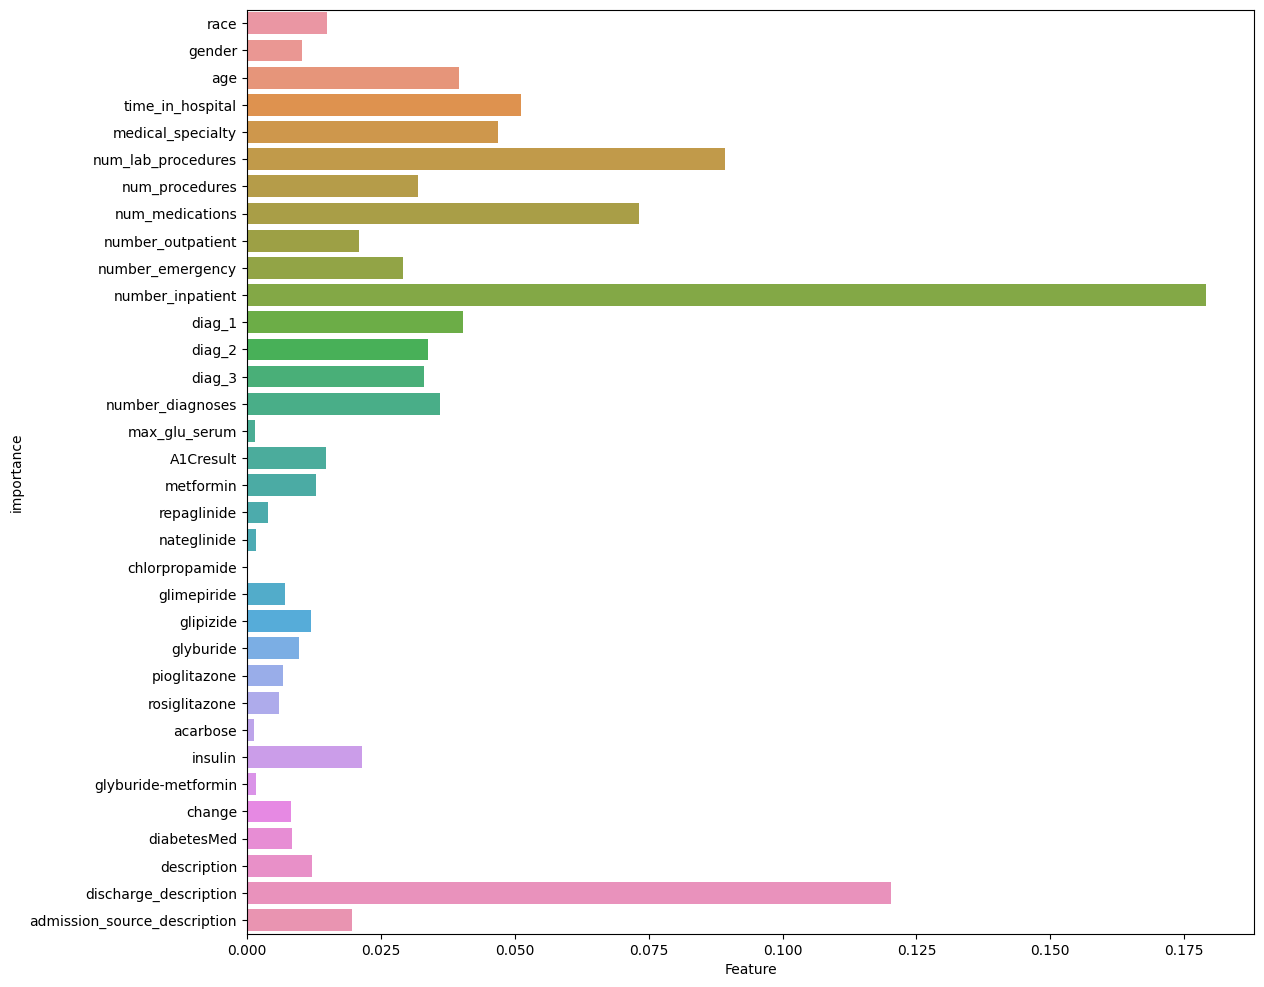

In [ ]:
z = pd.DataFrame([rf.feature_importances_,X_train.columns]).T
z.columns = ['Feature','importance']
plt.figure(figsize=(13,12))

sns.barplot(x=z['Feature'],y=z['importance'])

<Axes: xlabel='importance', ylabel='Feature'>

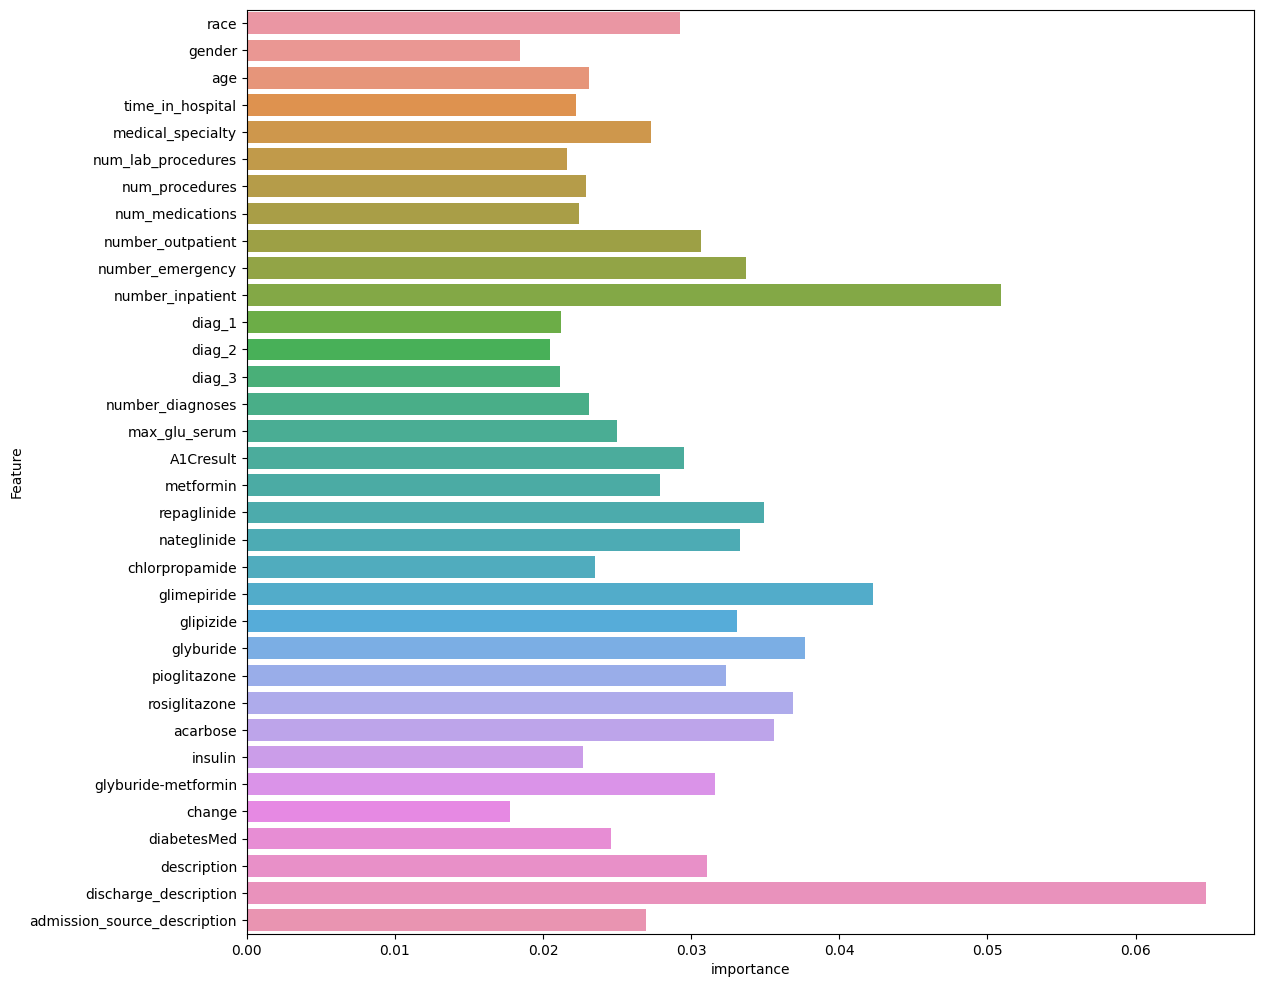

In [ ]:
z1 = pd.DataFrame([xgb.feature_importances_,X_train.columns]).T
z1.columns = ['importance','Feature']
plt.figure(figsize=(13,12))

sns.barplot(y=z1['Feature'],x=z1['importance'])

<Axes: xlabel='importance', ylabel='Feature'>

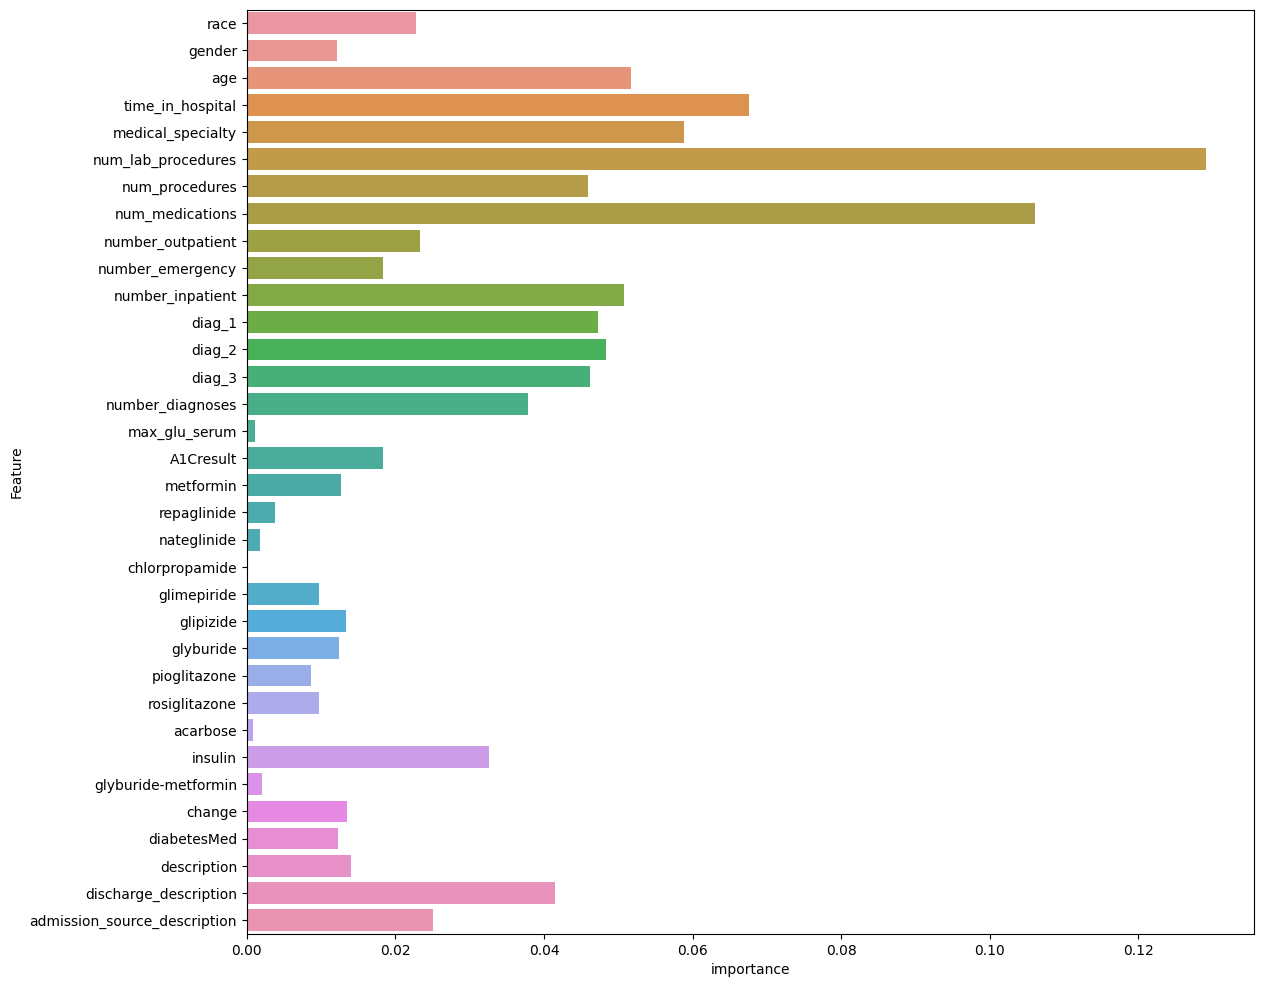

In [ ]:
z2 = pd.DataFrame([dtc_tuned.feature_importances_,X_train.columns]).T
z2.columns = ['importance','Feature']
plt.figure(figsize=(13,12))

sns.barplot(y=z2['Feature'],x=z2['importance'])

<Axes: xlabel='importance', ylabel='Feature'>

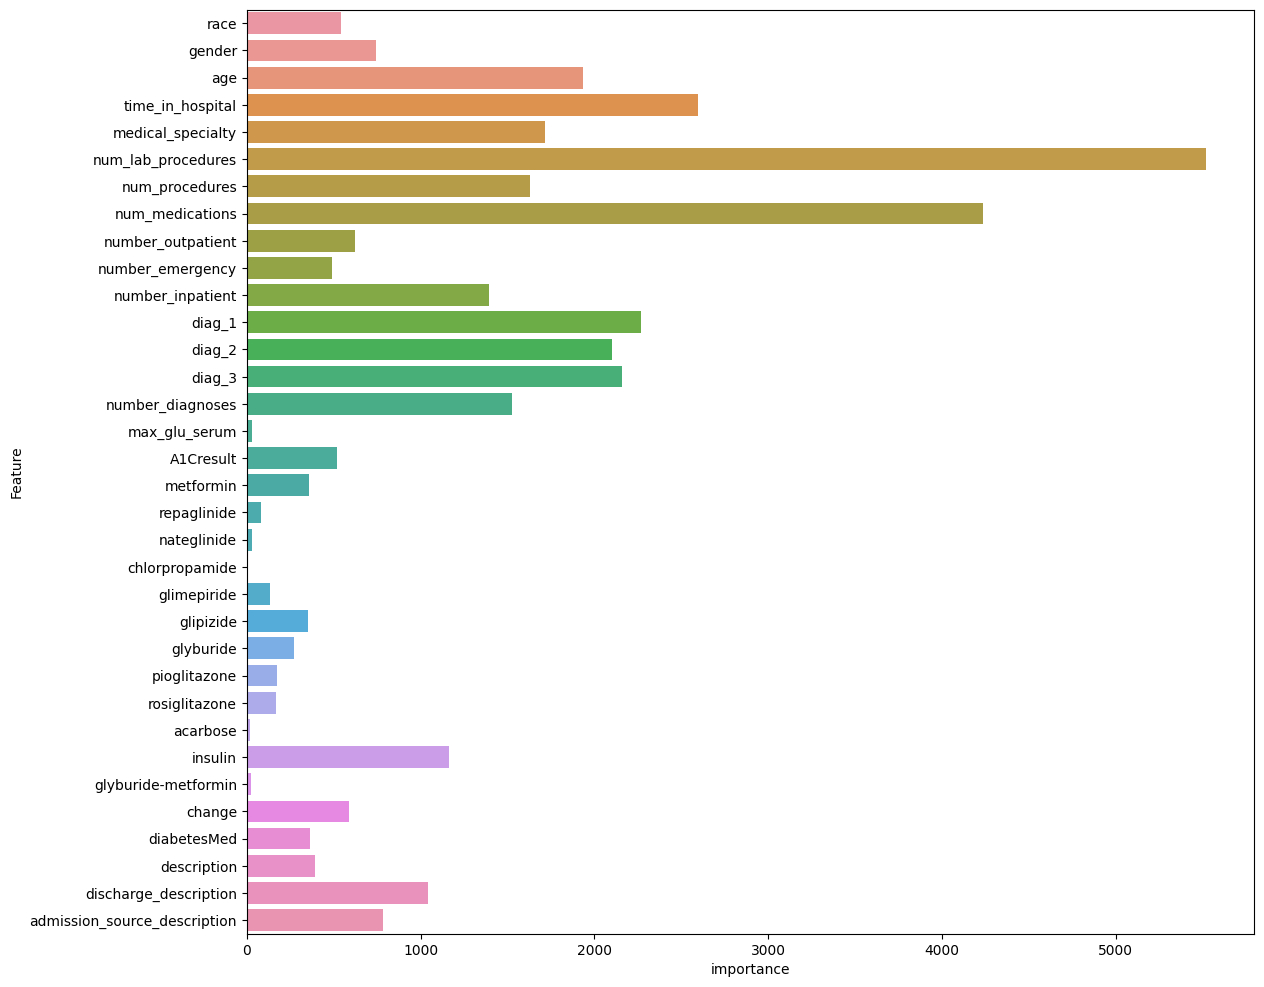

In [ ]:
z3 = pd.DataFrame([lgbm.feature_importances_,X_train.columns]).T
z3.columns = ['importance','Feature']
plt.figure(figsize=(13,12))

sns.barplot(y=z3['Feature'],x=z3['importance'])

In [ ]:
'''column_headers = np.array(df.columns.values)
a=np.array(new_df[3000],axis=0)
np.append(column_headers,a)'''

'column_headers = np.array(df.columns.values)\na=np.array(new_df[3000],axis=0)\nnp.append(column_headers,a)'

In [ ]:
'''print(svm_tuned.predict(X_test[1,:]))'''

'print(svm_tuned.predict(X_test[1,:]))'